In [1]:
# Parameters
TEST = True
QUICK_RUN = True


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize


import sys

In [3]:
import sys
sys.path.insert(0,"/usr/local/lib/python3.9/site-packages")
import pymysql
from textblob import TextBlob
import plotly as px

In [4]:
import sys
sys.path.insert(0,"/usr/local/lib/python3.9/site-packages")
import pymysql

In [5]:
import os

host_name = os.getenv('host_name')
passwd = os.getenv('aws_password')
user='group2'
database='group2db'

In [6]:
# Connecting AWS mysql Database
db = pymysql.connect(host=host_name,user=user,passwd=passwd,db=database)

In [7]:
cursor = db.cursor()

In [8]:
# Reading sql table for WEST into pandas DataFrame
west = pd.read_sql_query('''select * from tweets_locations where location IN ('Washington', 'Oregan', 'California', 'Montana', 'Idaho', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico') ''', db)

In [9]:
west.shape

(876, 3)

In [10]:
# Reading sql table for Mid WEST into pandas DataFrame
midwest = pd.read_sql_query('''select * from tweets_locations where location IN ('North Dakota', 'Minnesota', 'South Dakota', 'Iowa', 'Nebraska', 'Kansas', 'Missouri', 'Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio'
) ''', db)

In [11]:
midwest.shape

(699, 3)

In [12]:

# Reading sql table for South into pandas DataFrame
south = pd.read_sql_query('''select * from tweets_locations where location IN ('Oklahoma', 'Arkansas', 'Texas', 'Louisiana', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Maryland', 'Delaware', 'West Virginia', 'Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida')
 ''', db)

In [13]:
south.shape

(1474, 3)

In [14]:
# Reading sql table for EAST into pandas DataFrame
east = pd.read_sql_query('''select * from tweets_locations where location IN ('ME', 'Maine', 'NH', 'New Hampshire', 'VT', 'Vermont', 'MA', 'Massachusetts', 'CT', 'Connecticut', 'RI', 'Rhode Island', 'NY', 'New York', 'PA', 'Pennsylvania', 'NJ', 'New Jersey') ''', db)

In [15]:
east.shape

(1286, 3)

In [16]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
#  Function to clean the tweets
def remove_punc(message):
    Test_punc_removed = [ char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    return Test_punc_removed_join

In [18]:
west['tweet'] = west['tweet'].apply(remove_punc)
midwest['tweet'] = midwest['tweet'].apply(remove_punc)
south['tweet'] = south['tweet'].apply(remove_punc)
east['tweet'] = east['tweet'].apply(remove_punc)

In [19]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','tweet','today','week','year', 'https','httpstco', 'rt', 'RT'])

In [20]:
# Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in stop_words and len(token) >= 2:
            result.append(token)
    return result

In [21]:
# Function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Creating two new columns Subjectivity, Polarity
west['Subjectivity'] = west['tweet'].apply(getSubjectivity)
west['Polarity'] = west['tweet'].apply(getPolarity)

midwest['Subjectivity'] = midwest['tweet'].apply(getSubjectivity)
midwest['Polarity'] = midwest['tweet'].apply(getPolarity)

south['Subjectivity'] = south['tweet'].apply(getSubjectivity)
south['Polarity'] = south['tweet'].apply(getPolarity)

east['Subjectivity'] = east['tweet'].apply(getSubjectivity)
east['Polarity'] = east['tweet'].apply(getPolarity)

In [22]:
west

,tweet_id,tweet,location,Subjectivity,Polarity
0,6,RT DavidCaltabiano I spoke to countless senior...,Arizona,0.500000,0.250000
1,20,RT charlesgaba Holy shit They’re holding vacci...,Colorado,0.800000,-0.200000
2,25,nypost Wear a mask but write a message on it l...,California,0.500000,0.136364
3,26,RT AynRandPaulRyan Translation The Michigan st...,Colorado,0.000000,0.000000
4,29,RT realJeff45 This is why were supposed to que...,California,0.000000,0.000000
...,...,...,...,...,...
871,4540,RT SusanHennessey If you are a DC resident ove...,California,0.000000,0.000000
872,4544,Increased Exports\nBorder Wall\nRemain in Mexi...,California,0.000000,0.000000
873,4563,RT DrTomFrieden Hey My 91yearold mother just g...,New Mexico,0.333333,0.250000
874,4566,RT BrandonBeaber Get your vaccine as soon as i...,New Mexico,0.400000,0.400000


In [23]:
midwest

,tweet_id,tweet,location,Subjectivity,Polarity
0,1,RT JoeBiden Folks I just received the second d...,Michigan,0.333333,0.270833
1,2,RT charlesgaba Holy shit They’re holding vacci...,Ohio,0.800000,-0.200000
2,9,RT HighImpactFlix Doctor on CNN Don’t be ‘alar...,Michigan,0.000000,0.000000
3,32,I want it,Michigan,0.000000,0.000000
4,38,RT BoSnerdley Los Angeles students required to...,Illinois,0.400000,0.400000
...,...,...,...,...,...
694,4556,For awhile I wasnt sure if I would get the COV...,Illinois,0.888889,0.500000
695,4565,Wait They are throwing away spare doses and pe...,Kansas,0.500000,0.500000
696,4571,RT brandonjsmith5 I expect well hear this late...,Indiana,0.038462,0.000000
697,4573,Rodsplace Building antibodies is so 20th centu...,Missouri,0.000000,0.000000


In [24]:
south

,tweet_id,tweet,location,Subjectivity,Polarity
0,14,RT FowlerSarah Clearing up some Mississippi Co...,Mississippi,0.000000,0.000000
1,15,RT RepAdamSchiff This plan is a no brainer\n\n...,Florida,0.454545,0.136364
2,16,RT samstein NEW Amid the deadliest turn of the...,Texas,0.227273,0.068182
3,18,RT harrisonjaime Folks in SC please make sure ...,Texas,0.662963,0.466667
4,19,RT JoeBiden Folks I just received the second d...,Texas,0.333333,0.270833
...,...,...,...,...,...
1469,4574,RT SunSentinel COVID19 vaccine could soon be o...,Florida,0.000000,0.000000
1470,4575,RT HealthyOklahoma ALERT Please remain cautiou...,Oklahoma,0.233333,0.066667
1471,4579,RT NationHahn I loved hearing about NCHealthNe...,North Carolina,0.800000,0.700000
1472,4580,Can Flu Vaccine Increase COVID Risk • Children...,Texas,0.000000,0.000000


In [25]:
east

,tweet_id,tweet,location,Subjectivity,Polarity
0,3,I will be Mr President Need to know when the h...,Massachusetts,0.540000,0.160000
1,4,RT rmslim Friends all of whom are physicians w...,New York,0.000000,0.000000
2,5,RT KyleLacio McMaster is skipping the grocery ...,New Jersey,0.000000,0.000000
3,7,RT PowerDNSBert After dissecting the BioNTechG...,Massachusetts,0.000000,0.000000
4,8,eugenegu Why did they take years and why did t...,New York,0.950000,0.300000
...,...,...,...,...,...
1281,4567,So why did we NY throw vaccines away CNN FoxNe...,New York,0.000000,0.000000
1282,4569,RT rickberke NEW reporting from HelenBranswell...,New York,0.454545,0.136364
1283,4572,RT HeatherHPierce A5 Recent polls show that 71...,New York,0.500000,0.125000
1284,4577,We good,New Jersey,0.600000,0.700000


In [26]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return "Neutral"
    else:
        return 'Positive'

west['West Analysis'] = west['Polarity'].apply(getAnalysis)
midwest['MidWest'] = midwest['Polarity'].apply(getAnalysis)
south['South Analysis'] = south['Polarity'].apply(getAnalysis)
east['East Analysis'] = east['Polarity'].apply(getAnalysis)

In [27]:
west.head()

,tweet_id,tweet,location,Subjectivity,Polarity,West Analysis
0,6,RT DavidCaltabiano I spoke to countless senior...,Arizona,0.5,0.250000,Positive
1,20,RT charlesgaba Holy shit They’re holding vacci...,Colorado,0.8,-0.200000,Negative
2,25,nypost Wear a mask but write a message on it l...,California,0.5,0.136364,Positive
3,26,RT AynRandPaulRyan Translation The Michigan st...,Colorado,0.0,0.000000,Neutral
4,29,RT realJeff45 This is why were supposed to que...,California,0.0,0.000000,Neutral


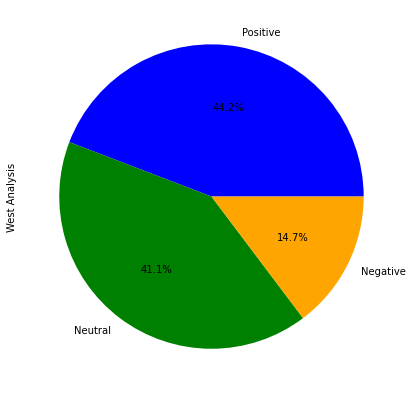

In [28]:
west['West Analysis'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7,7), colors=['blue', 'green', 'orange'])

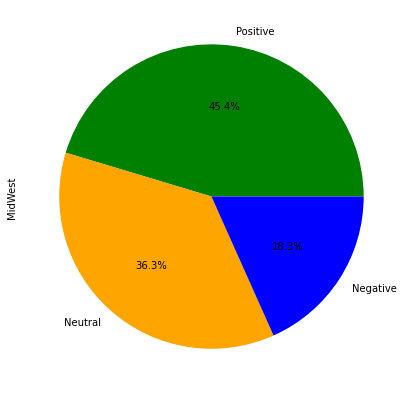

In [29]:
midwest['MidWest'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7,7), colors=['green', 'orange', 'blue'])

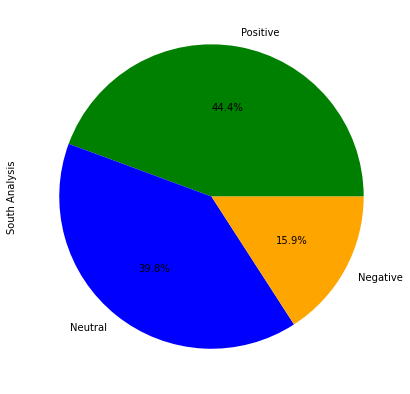

In [30]:
south['South Analysis'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7,7), colors=['green', 'blue', 'orange'])

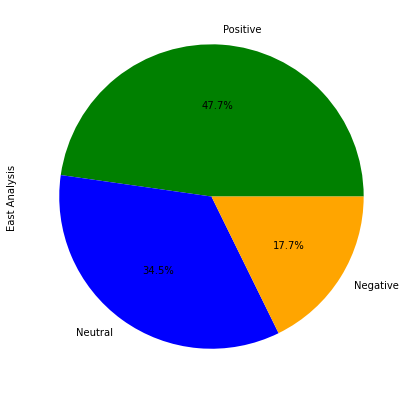

In [31]:
east['East Analysis'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7,7), colors=['green', 'blue', 'orange'])

In [32]:
df = pd.DataFrame({'West Analysis':west['West Analysis'], 'MidWest Analysis': midwest['MidWest'], 'South Analysis': south['South Analysis'], 'East Analysis': east['East Analysis']})
df.head()


,West Analysis,MidWest Analysis,South Analysis,East Analysis
0,Positive,Positive,Neutral,Positive
1,Negative,Negative,Positive,Neutral
2,Positive,Neutral,Positive,Neutral
3,Neutral,Neutral,Positive,Neutral
4,Neutral,Positive,Positive,Positive


In [33]:
df.tail()

,West Analysis,MidWest Analysis,South Analysis,East Analysis
1469,NaN,NaN,Neutral,NaN
1470,NaN,NaN,Positive,NaN
1471,NaN,NaN,Positive,NaN
1472,NaN,NaN,Neutral,NaN
1473,NaN,NaN,Neutral,NaN


In [34]:
df2 = df.apply(pd.value_counts)

In [35]:
df2

,West Analysis,MidWest Analysis,South Analysis,East Analysis
Positive,387,317,654,614
Neutral,360,254,586,444
Negative,129,128,234,228


In [36]:
# df2 = df2.rename(columns={'index':'Analysis'})

In [37]:
# df2

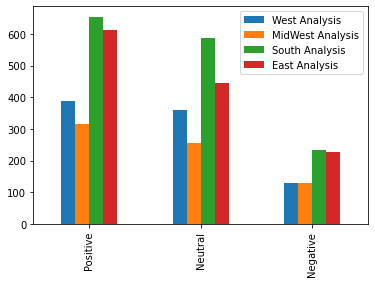

In [38]:
df2.plot(y=['West Analysis', 'MidWest Analysis', 'South Analysis', 'East Analysis'], kind='bar')

In [39]:
df3 = df2.T
df3

,Positive,Neutral,Negative
West Analysis,387,360,129
MidWest Analysis,317,254,128
South Analysis,654,586,234
East Analysis,614,444,228


In [40]:
df4 = df3.reset_index()
df4 = df4.rename(columns={'index':'USA REGIONS'})
df4

,USA REGIONS,Positive,Neutral,Negative
0,West Analysis,387,360,129
1,MidWest Analysis,317,254,128
2,South Analysis,654,586,234
3,East Analysis,614,444,228


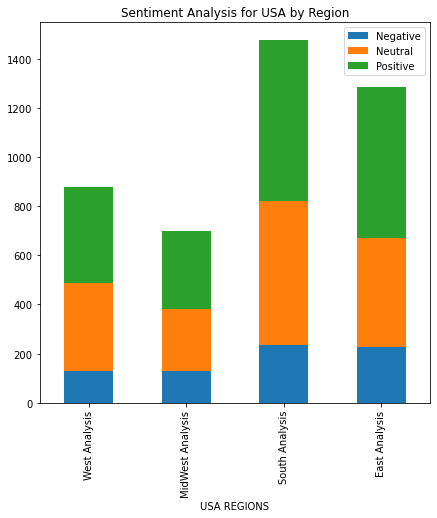

In [41]:
df4.plot(x='USA REGIONS', y=['Negative', 'Neutral', 'Positive'], 
                       kind='bar', stacked=True, 
                       title='Sentiment Analysis for USA by Region', figsize=(7,7))

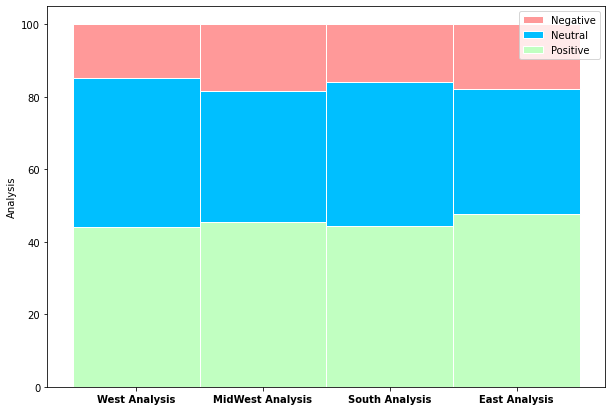

In [42]:
#Get values from the group and categories
x_axis = df4['USA REGIONS']
Negative = df4['Negative']
Neutral = df4['Neutral']
Positive = df4['Positive']
total = Negative + Neutral + Positive
# print(total)

proportion_Negative = np.true_divide(Negative, total) * 100
proportion_Neutral = np.true_divide(Neutral, total) * 100
proportion_Positive = np.true_divide(Positive, total) * 100
  
#add colors
colors = ['#FF9999', '#00BFFF','#C1FFC1']

# The position of the bars on the x-axis
r = range(len(x_axis))

barWidth = 1

#plot bars
plt.figure(figsize=(10, 7))
ax1 = plt.bar(r, proportion_Negative, bottom=proportion_Neutral+proportion_Positive, color=colors[0], edgecolor='white', width=barWidth, label="Negative")
ax2 = plt.bar(r, proportion_Neutral, bottom=proportion_Positive, color=colors[1], edgecolor='white', width=barWidth, label='Neutral')
ax3 = plt.bar(r, proportion_Positive, color=colors[2], edgecolor='white', width=barWidth, label='Positive')
plt.legend()
plt.xticks(r, x_axis, fontweight='bold')
plt.ylabel("Analysis")

plt.show()